<a href="https://colab.research.google.com/github/inesluparia/ML/blob/master/StudentsFinalGrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [812]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import argmax

In [813]:
!git clone https://github.com/inesluparia/ML.git

fatal: destination path 'ML' already exists and is not an empty directory.


In [814]:
dataFrame = pd.read_csv('ML/StudentsFinalGrade/student_prediction.csv')

In [815]:
dataFrame.head() #print top of the data

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


In [816]:
dataFrame.shape

(145, 33)

In [817]:
dataFrame.columns

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')

In [818]:
dataFrame = dataFrame.drop(['STUDENTID','CLASSROOM', 'IMPACT', 'COURSE ID'], axis=1)
dataFrame.columns

Index(['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY',
       'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU',
       '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS',
       'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'ATTEND', 'PREP_STUDY',
       'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS', 'CUML_GPA', 'EXP_GPA',
       'GRADE'],
      dtype='object')

In [819]:
dataFrame.isnull().sum()

AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CUML_GPA         0
EXP_GPA          0
GRADE            0
dtype: int64

In [820]:
dataFrame.dropna(inplace=True)

In [821]:
dataFrame = dataFrame.applymap(str)
print(dataFrame.dtypes)


AGE              object
GENDER           object
HS_TYPE          object
SCHOLARSHIP      object
WORK             object
ACTIVITY         object
PARTNER          object
SALARY           object
TRANSPORT        object
LIVING           object
MOTHER_EDU       object
FATHER_EDU       object
#_SIBLINGS       object
KIDS             object
MOTHER_JOB       object
FATHER_JOB       object
STUDY_HRS        object
READ_FREQ        object
READ_FREQ_SCI    object
ATTEND_DEPT      object
ATTEND           object
PREP_STUDY       object
PREP_EXAM        object
NOTES            object
LISTENS          object
LIKES_DISCUSS    object
CUML_GPA         object
EXP_GPA          object
GRADE            object
dtype: object


In [822]:
pd.set_option('display.max_columns', None) # print all columns ??? print where?

In [823]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            145 non-null    object
 1   GENDER         145 non-null    object
 2   HS_TYPE        145 non-null    object
 3   SCHOLARSHIP    145 non-null    object
 4   WORK           145 non-null    object
 5   ACTIVITY       145 non-null    object
 6   PARTNER        145 non-null    object
 7   SALARY         145 non-null    object
 8   TRANSPORT      145 non-null    object
 9   LIVING         145 non-null    object
 10  MOTHER_EDU     145 non-null    object
 11  FATHER_EDU     145 non-null    object
 12  #_SIBLINGS     145 non-null    object
 13  KIDS           145 non-null    object
 14  MOTHER_JOB     145 non-null    object
 15  FATHER_JOB     145 non-null    object
 16  STUDY_HRS      145 non-null    object
 17  READ_FREQ      145 non-null    object
 18  READ_FREQ_SCI  145 non-null   

In [824]:
X = dataFrame.iloc[:, 0:-1] # select relevant rows and columns to X
y = dataFrame.iloc[:,-1] # select column(s) for y (here only the last column)

In [825]:
X = pd.get_dummies(X)
columnNames = list(X.columns)

In [826]:
print(y[0:5])

0    1
1    1
2    1
3    1
4    1
Name: GRADE, dtype: object


In [827]:
print(X.shape)

(145, 101)


In [828]:
print(X.iloc[0:5,:])

   AGE_1  AGE_2  AGE_3  GENDER_1  GENDER_2  HS_TYPE_1  HS_TYPE_2  HS_TYPE_3  \
0      0      1      0         0         1          0          0          1   
1      0      1      0         0         1          0          0          1   
2      0      1      0         0         1          0          1          0   
3      1      0      0         1         0          1          0          0   
4      0      1      0         0         1          1          0          0   

   SCHOLARSHIP_1  SCHOLARSHIP_2  SCHOLARSHIP_3  SCHOLARSHIP_4  SCHOLARSHIP_5  \
0              0              0              1              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              1              0              0   

   WORK_1  WORK_2  ACTIVITY_1  ACTIVITY_2  P

In [829]:
X = X.values # convert from Pandas dataframe to numpy array
y = y.values

In [830]:
print(y[:])
#changing it back to int
y = y.astype(np.int8)
print(y[:])

['1' '1' '1' '1' '1' '2' '5' '2' '5' '0' '2' '0' '0' '1' '2' '2' '1' '2'
 '2' '3' '1' '1' '3' '1' '2' '3' '1' '1' '3' '5' '5' '3' '1' '2' '2' '1'
 '2' '1' '2' '1' '1' '1' '1' '4' '1' '3' '5' '3' '1' '2' '1' '4' '1' '5'
 '3' '3' '5' '4' '3' '5' '2' '5' '3' '5' '3' '2' '5' '1' '5' '5' '7' '6'
 '6' '6' '7' '7' '4' '7' '4' '3' '4' '3' '7' '7' '7' '4' '5' '6' '6' '6'
 '6' '6' '7' '4' '6' '5' '7' '6' '7' '7' '6' '7' '7' '7' '3' '7' '7' '6'
 '6' '7' '2' '2' '2' '1' '2' '1' '1' '1' '1' '2' '1' '0' '2' '1' '3' '2'
 '3' '1' '0' '3' '1' '4' '3' '3' '1' '2' '0' '2' '0' '0' '5' '5' '1' '4'
 '3']
[1 1 1 1 1 2 5 2 5 0 2 0 0 1 2 2 1 2 2 3 1 1 3 1 2 3 1 1 3 5 5 3 1 2 2 1 2
 1 2 1 1 1 1 4 1 3 5 3 1 2 1 4 1 5 3 3 5 4 3 5 2 5 3 5 3 2 5 1 5 5 7 6 6 6
 7 7 4 7 4 3 4 3 7 7 7 4 5 6 6 6 6 6 7 4 6 5 7 6 7 7 6 7 7 7 3 7 7 6 6 7 2
 2 2 1 2 1 1 1 1 2 1 0 2 1 3 2 3 1 0 3 1 4 3 3 1 2 0 2 0 0 5 5 1 4 3]


In [831]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X) # calculate mean and standard deviation and convert dataframe to numpy array
#print(X[0:6,:])

In [832]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 222 )
# random_state set to some value will provide same output

In [833]:
model = Sequential()
model.add(Dense(101,activation='relu'))
model.add(Dense(101,activation='relu'))
model.add(Dense(1, activation='relu'))
######model.add(Dense(7)) # would have been the case if also created dummies for y. 

adam = Adam(learning_rate=0.001) 
model.compile(loss='mse', optimizer=adam)  
# use loss = 'binary_crossentropy' for two-class classification.
#use loss = 'categorical_crossentropy' for multi-class classification.
#use loss = mse (Mean Square Error) for regression (e.g. the Age,Height exercise). 
#use metrics = ['accuracy']. It shows successful predictions / total predictions

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.

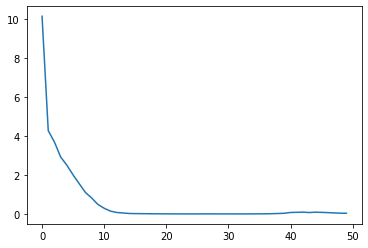

In [835]:
#show loss vs epochs
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [836]:
#Get model prediction accuracy on test data
model.evaluate(X_test,y_test,verbose=1) 

1/1 [==============================] - 0s 104ms/step - loss: 3.5934


3.593369483947754

In [837]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(y_pred.shape)
print(y_test.shape)
print(type(y_pred))
print(type(y_test))

(29,)
(29,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [838]:
compareArr = np.vstack((y_pred, y_test)).T
print(compareArr)
#tmp = np.zeros(shape=(29,8))
#def convertYpred(arr):
#  c = 0
#  for item in arr:
#    index = argmax(item)
#    tmp[c,index] = 1
#    c += 1
#  return tmp
#y_pred_conv = convertYpred(y_pred).astype(int)
#print(y_pred_conv.shape)
#print(y_pred_conv[:,:])

#tmp = np.zeros(shape=(145,8))

[[1.9243025 1.       ]
 [4.252802  7.       ]
 [3.633413  5.       ]
 [7.824126  7.       ]
 [3.6473584 3.       ]
 [4.468663  5.       ]
 [2.698596  1.       ]
 [4.667538  1.       ]
 [4.959505  7.       ]
 [2.5846615 5.       ]
 [1.9555413 2.       ]
 [1.2931898 2.       ]
 [1.9177778 1.       ]
 [4.0238376 0.       ]
 [5.1852756 5.       ]
 [2.6119337 1.       ]
 [3.112252  6.       ]
 [1.6639551 1.       ]
 [3.0013673 1.       ]
 [2.6484027 1.       ]
 [3.4040563 1.       ]
 [1.4165943 0.       ]
 [4.2141232 2.       ]
 [2.7410495 3.       ]
 [1.5297623 2.       ]
 [4.1864758 3.       ]
 [5.1041274 6.       ]
 [2.4617825 6.       ]
 [4.312356  6.       ]]


In [839]:
print(columnNames)

['AGE_1', 'AGE_2', 'AGE_3', 'GENDER_1', 'GENDER_2', 'HS_TYPE_1', 'HS_TYPE_2', 'HS_TYPE_3', 'SCHOLARSHIP_1', 'SCHOLARSHIP_2', 'SCHOLARSHIP_3', 'SCHOLARSHIP_4', 'SCHOLARSHIP_5', 'WORK_1', 'WORK_2', 'ACTIVITY_1', 'ACTIVITY_2', 'PARTNER_1', 'PARTNER_2', 'SALARY_1', 'SALARY_2', 'SALARY_3', 'SALARY_4', 'SALARY_5', 'TRANSPORT_1', 'TRANSPORT_2', 'TRANSPORT_3', 'TRANSPORT_4', 'LIVING_1', 'LIVING_2', 'LIVING_3', 'LIVING_4', 'MOTHER_EDU_1', 'MOTHER_EDU_2', 'MOTHER_EDU_3', 'MOTHER_EDU_4', 'MOTHER_EDU_5', 'MOTHER_EDU_6', 'FATHER_EDU_1', 'FATHER_EDU_2', 'FATHER_EDU_3', 'FATHER_EDU_4', 'FATHER_EDU_5', 'FATHER_EDU_6', '#_SIBLINGS_1', '#_SIBLINGS_2', '#_SIBLINGS_3', '#_SIBLINGS_4', '#_SIBLINGS_5', 'KIDS_1', 'KIDS_2', 'KIDS_3', 'MOTHER_JOB_1', 'MOTHER_JOB_2', 'MOTHER_JOB_3', 'MOTHER_JOB_4', 'MOTHER_JOB_5', 'FATHER_JOB_1', 'FATHER_JOB_2', 'FATHER_JOB_3', 'FATHER_JOB_4', 'FATHER_JOB_5', 'STUDY_HRS_1', 'STUDY_HRS_2', 'STUDY_HRS_3', 'STUDY_HRS_4', 'STUDY_HRS_5', 'READ_FREQ_1', 'READ_FREQ_2', 'READ_FREQ_3', 

In [840]:
#new_value = [[27, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 3, 1, 2, 4, 3, 3, 3, 2, 3, 1, 1, 2, 2, 2, 2, 3, 5, 5]] # enter new data in 2D array. Only numbers + dummy variables. 
#new_value = scaler.transform(new_value) # Don't forget to scale!
#print(new_value)
#model.predict(new_value)